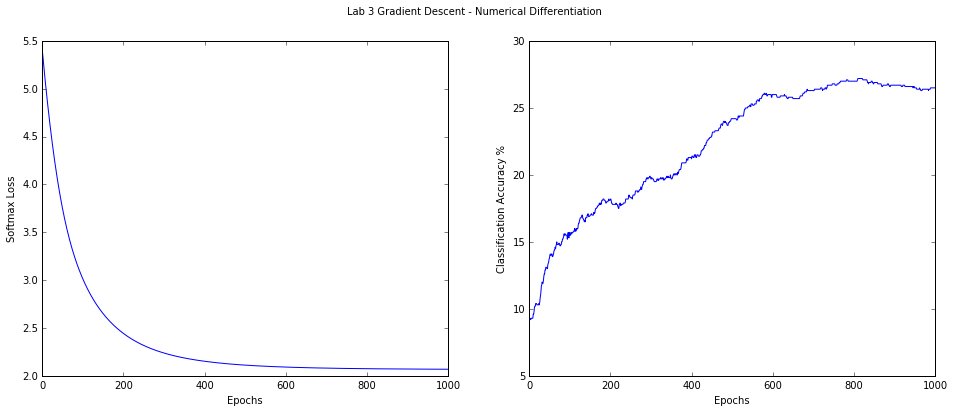

In [9]:
%matplotlib inline 
import numpy as np
import pdb
import pandas
import matplotlib.pyplot as plt
import copy

class grad_desc_loss():
    def __init__(self,features,labels,num_class):
        self.x = features
        self.lab = labels
        self.num_classes = num_class
        self.num_features, self.num_samples = np.shape(self.x)
        self.lab_onehot = np.zeros((self.num_classes,self.num_samples))
        self.W = np.random.randn(self.num_classes, self.num_features)
        # self.W = np.zeros((self.num_classes, self.num_features))
        self.scores = np.zeros((self.num_classes,self.num_samples))
        self.loss = 0.0
        #calculate one hot version of labels
        for i in range(self.num_samples):
            self.lab_onehot[self.lab[0,i],i] = 1.0
        self.grad = np.zeros((self.num_classes, self.num_features)) #gradient of L wrt W
        self.num_epochs = 1000
        self.loss_array = np.zeros(self.num_epochs)
        self.accuracy_array = np.zeros(self.num_epochs)

    def calc_loss_softmax(self):
        Lmat = np.zeros((self.num_classes,self.num_samples))
        self.scores = np.dot(self.W,self.x)
        b = np.max(self.scores,0) # used for the exp-normalize trick (see timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)
        Lmat = -np.log(np.divide(np.exp(np.subtract(self.scores,b)),np.sum(np.exp(np.subtract(self.scores,b)),0))) #loss matrix
        self.loss = np.sum(np.sum(self.lab_onehot*Lmat,0))/self.num_samples
        return self.loss

    def numerical_gradient(self):
        eps = 1e-6
        for i in range(self.num_classes):
            for j in range(self.num_features):
                loss = self.calc_loss_softmax()
                self.W[i,j] = self.W[i,j] + eps
                loss_eps = self.calc_loss_softmax()
                self.W[i,j] = self.W[i,j] - eps
                self.grad[i,j] = (loss_eps - loss)/eps

    def minimize_loss(self):
        step_size = 0.1
        for i in range(self.num_epochs):
            self.loss_array[i] = self.calc_loss_softmax()
            self.accuracy_array[i] = self.calc_accuracy()
            self.numerical_gradient()
            self.W = self.W - step_size*self.grad
        self.make_plots()

    def calc_accuracy(self):
        z = np.argmax(self.scores, axis=0) #our predicted class
        accuracy =  (np.sum(z==self.lab[0,:])/float(self.num_samples))*100.0
        return accuracy

    def make_plots(self):
        width = 16
        height = 6
        plt.figure(figsize=(width,height))
        plt.subplot('121')
        plt.plot(self.loss_array)
        plt.xlabel('Epochs')
        plt.ylabel('Softmax Loss')
        plt.subplot('122')
        plt.plot(self.accuracy_array)
        plt.xlabel('Epochs')
        plt.ylabel('Classification Accuracy %')
        plt.suptitle('Lab 3 Gradient Descent - Numerical Differentiation')
        plt.show()

if __name__ == '__main__':
    #Load CIFAR-10 Data Set--------------------------------
    def unpickle( file ):
        import cPickle
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict
    #------------------------------------------------------
    data = unpickle( 'cifar-10-batches-py/data_batch_1' )

    features = data['data'] #size is #samples(10000) x #features(3072)
    labels = data['labels']
    labels = np.atleast_2d( labels ).T #size is number of samples x 1
    N = 1000
    D = 10 #number of features
    # only keep N samples
    features = features[0:N,:]
    labels = labels[0:N,:]
    #project down into a D-dimensional space
    features = np.dot(features,np.random.randn(3072,D))
    #whiten our data - zero mean and unit standard deviation
    features = (features - np.mean(features,axis=0))/np.std(features,axis=0)
    features = features.T
    labels = labels.T
    num_class = 10 #number of classes
    grad_desc = grad_desc_loss(features,labels,num_class)
    grad_desc.minimize_loss()


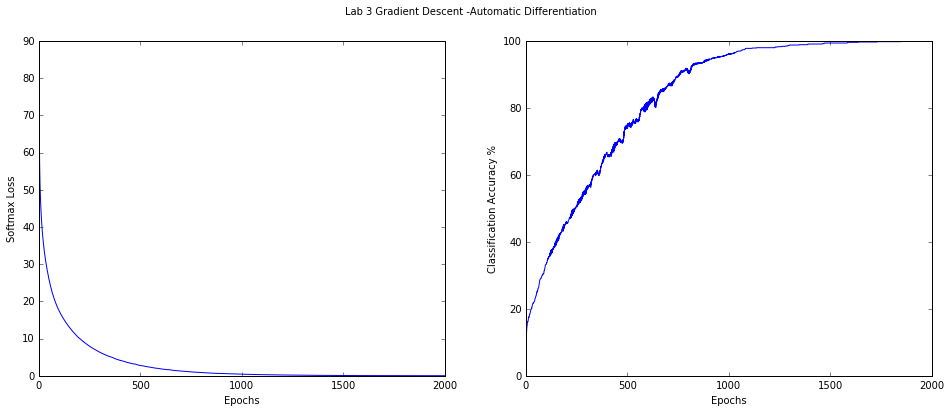

In [10]:
%matplotlib inline 
import pdb
import pandas
import matplotlib.pyplot as plt
import copy
import autograd.numpy as np
from autograd import grad

class grad_desc_loss():
    def __init__(self,features,labels,num_class):
        self.x = features
        self.lab = labels
        self.num_classes = num_class
        self.num_features, self.num_samples = np.shape(self.x)
        self.lab_onehot = np.zeros((self.num_classes,self.num_samples))
        self.W = np.random.randn(self.num_classes, self.num_features)
        # self.W = np.zeros((self.num_classes, self.num_features))
        self.scores = np.zeros((self.num_classes,self.num_samples))
        self.loss = 0.0
        #calculate one hot version of labels
        for i in range(self.num_samples):
            self.lab_onehot[self.lab[0,i],i] = 1.0
        self.grad = np.zeros((self.num_classes, self.num_features)) #gradient of L wrt W
        self.num_epochs = 2000
        self.loss_array = np.zeros(self.num_epochs)
        self.accuracy_array = np.zeros(self.num_epochs)

    def calc_loss_softmax(self,W):
        Lmat = np.zeros((self.num_classes,self.num_samples))
        self.scores = np.dot(W,self.x)
        b = np.max(self.scores,0) # used for the exp-normalize trick (see timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)
        Lmat = -np.log(np.divide(np.exp(np.subtract(self.scores,b)),np.sum(np.exp(np.subtract(self.scores,b)),0))) #loss matrix
        self.loss = np.sum(np.sum(self.lab_onehot*Lmat,0))/self.num_samples
        return self.loss

    def minimize_loss(self):
        step_size = 0.1
        for i in range(self.num_epochs):
            self.loss_array[i] = self.calc_loss_softmax(self.W)
            self.accuracy_array[i] = self.calc_accuracy()
            self.grad = grad(self.calc_loss_softmax)
            self.W = self.W - step_size*self.grad(self.W)
        self.make_plots()

    def calc_accuracy(self):
        z = np.argmax(self.scores, axis=0) #our predicted class
        accuracy =  (np.sum(z==self.lab[0,:])/float(self.num_samples))*100.0
        return accuracy

    def make_plots(self):
        width = 16
        height = 6
        plt.figure(figsize=(width,height))
        plt.subplot('121')
        plt.plot(self.loss_array)
        plt.xlabel('Epochs')
        plt.ylabel('Softmax Loss')
        plt.subplot('122')
        plt.plot(self.accuracy_array)
        plt.xlabel('Epochs')
        plt.ylabel('Classification Accuracy %')
        plt.suptitle('Lab 3 Gradient Descent -Automatic Differentiation')
        plt.show()

if __name__ == '__main__':
    #Load CIFAR-10 Data Set--------------------------------
    def unpickle( file ):
        import cPickle
        fo = open(file, 'rb')
        dict = cPickle.load(fo)
        fo.close()
        return dict
    #------------------------------------------------------
    data = unpickle( 'cifar-10-batches-py/data_batch_1' )

    features = data['data'] #size is #samples(10000) x #features(3072)
    labels = data['labels']
    labels = np.atleast_2d( labels ).T #size is number of samples x 1
    N = 1000
    # D = 10
    # only keep N samples
    features = features[0:N,:]
    labels = labels[0:N,:]
    # #project down into a D-dimensional space
    # features = np.dot(features,np.random.randn(3072,D))

    #whiten our data - zero mean and unit standard deviation
    features = (features - np.mean(features,axis=0))/np.std(features,axis=0)
    features = features.T
    labels = labels.T
    num_class = 10 #number of classes
    grad_desc = grad_desc_loss(features,labels,num_class)
    grad_desc.minimize_loss()